In [1]:
import os
import sys
import yaml

src_directory = os.path.abspath(r"D:\Desktop\Work\Official Repo\src")
if src_directory not in sys.path:
    sys.path.append(src_directory)

from data.preprocessing import load_and_preprocess_data
from models.autoencoder import train_and_optimize_autoencoder, save_latent_representations, plot_lifeline_reconstruction, create_autoencoder_model
from analysis.analysis import load_autoencoder_model, save_latent_perturbation_analysis


c:\Users\elysi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_config(config_path):
    """
    Load YAML configuration file from the specified path.
    """
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

In [3]:
config = load_config("D:/Desktop/Work/Official Repo/configs/config.yaml")

folder_path = r"D:\Desktop\Work\Official Repo\src\data\100_dFBA_Lifelines"
downsample_factor = config["data"]["downsample_factor"]
expected_timepoints = config["data"]["expected_timepoints"]

In [4]:
# Load and preprocess data
print("Loading and preprocessing data...")
normalized_data = load_and_preprocess_data(folder_path, expected_timepoints, downsample_factor)

Loading and preprocessing data...


D:\Desktop\Work\Official Repo\src\data\preprocessing.py:27: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::downsample_factor][:expected_timepoints]
D:\Desktop\Work\Official Repo\src\data\preprocessing.py:27: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::downsample_factor][:expected_timepoints]
D:\Desktop\Work\Official Repo\src\data\preprocessing.py:27: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  reduced_df = lifeline_df.iloc[::downsa

Shape of the preprocessed data: (101, 376, 48)


In [10]:
# Train and optimize autoencoder for the standard model
print("Training and optimizing standard autoencoder...")
best_model_standard = train_and_optimize_autoencoder(normalized_data, config, model_type='autoencoder', use_one_cycle_lr=True)

[I 2024-04-03 11:46:19,673] A new study created in memory with name: no-name-cab33a1b-0810-493a-92f4-c5712e8604ab


Training and optimizing standard autoencoder...


[I 2024-04-03 11:47:08,964] Trial 0 finished with value: 1.0903218984603882 and parameters: {'lstm_units': 100, 'lstm_units_layer2': 70, 'dense_units': 50, 'dropout_rate': 0.14997147168684855, 'learning_rate': 0.0064526885993752975, 'batch_size': 32}. Best is trial 0 with value: 1.0903218984603882.


Best parameters: {'lstm_units': 100, 'lstm_units_layer2': 70, 'dense_units': 50, 'dropout_rate': 0.14997147168684855, 'learning_rate': 0.0064526885993752975, 'batch_size': 32}
Epoch 1/5
3/3 [==============================] - 13s 2s/step - loss: 0.9997 - val_loss: 0.9978 - lr: 0.0034
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 0.9990 - val_loss: 0.9966 - lr: 0.0034
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 0.9980 - val_loss: 0.9951 - lr: 0.0034
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 0.9966 - val_loss: 0.9918 - lr: 0.0034
Epoch 5/5
3/3 [==============================] - 7s 2s/step - loss: 0.9936 - val_loss: 1.0073 - lr: 0.0034
Model saved to src/models/autoencoder_best_model.h5


In [11]:
latent_file_path_standard = r"D:\Desktop\Work\Official Repo\src\models\latent_representations_standard.xlsx"
save_latent_representations(best_model_standard, normalized_data, latent_file_path_standard)

4/4 [==============================] - 3s 454ms/step
Latent representations saved to D:\Desktop\Work\Official Repo\src\models\latent_representations_standard.xlsx.


4/4 [==============================] - 4s 586ms/step


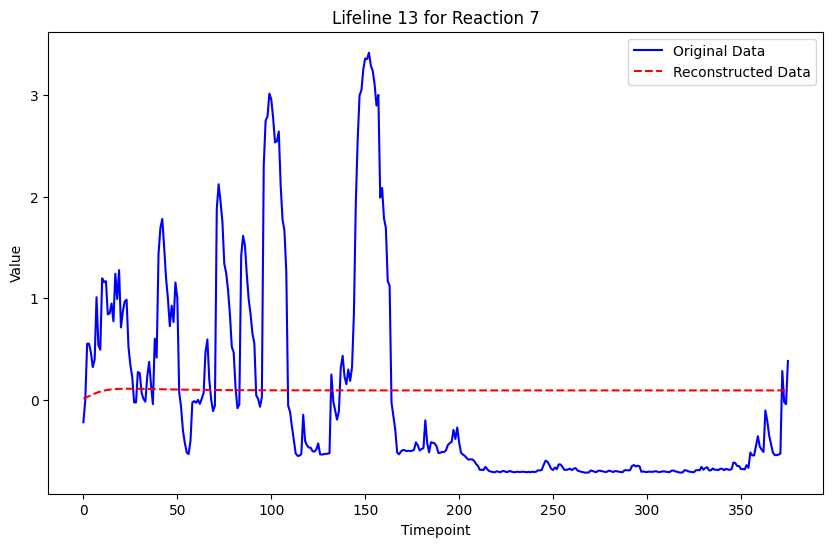

<Figure size 640x480 with 0 Axes>

In [12]:
lifeline_index = config["plotting"]["lifeline_index"]
reaction_index = config["plotting"]["reaction_index"]
plot_save_path_standard = "D:/Desktop/Work/Official Repo/plots/lifeline_reconstruction_standard.png"  # Adjust this path as needed
plot_lifeline_reconstruction(best_model_standard, normalized_data, lifeline_index, reaction_index, plot_save_path_standard)

In [13]:
# Train and optimize autoencoder for the timestep model
print("Training and optimizing timestep autoencoder...")
best_model_timesteps = train_and_optimize_autoencoder(normalized_data, config, model_type='autoencoder_timesteps', use_one_cycle_lr=True)

[I 2024-04-03 11:54:48,412] A new study created in memory with name: no-name-76c1870e-28b2-42ee-8261-d96eea295f1e


Training and optimizing timestep autoencoder...


[I 2024-04-03 11:55:45,328] Trial 0 finished with value: 0.2904152274131775 and parameters: {'lstm_units': 100, 'lstm_units_layer2': 70, 'dense_units': 50, 'dropout_rate': 0.48013558974344905, 'learning_rate': 0.0011799782281294376, 'batch_size': 16}. Best is trial 0 with value: 0.2904152274131775.


Best parameters: {'lstm_units': 100, 'lstm_units_layer2': 70, 'dense_units': 50, 'dropout_rate': 0.48013558974344905, 'learning_rate': 0.0011799782281294376, 'batch_size': 16}
Epoch 1/5
5/5 [==============================] - 15s 2s/step - loss: 0.9796 - val_loss: 0.9193 - lr: 6.9450e-04
Epoch 2/5
5/5 [==============================] - 10s 2s/step - loss: 0.9202 - val_loss: 0.8302 - lr: 6.9450e-04
Epoch 3/5
5/5 [==============================] - 10s 2s/step - loss: 0.8481 - val_loss: 0.7508 - lr: 6.9450e-04
Epoch 4/5
5/5 [==============================] - 10s 2s/step - loss: 0.7841 - val_loss: 0.6865 - lr: 6.9450e-04
Epoch 5/5
5/5 [==============================] - 9s 2s/step - loss: 0.7213 - val_loss: 0.6337 - lr: 6.9450e-04
Model saved to src/models/autoencoder_timesteps_best_model.h5


In [14]:
# Save latent representations and plot reconstruction for the timestep model
latent_file_path_timesteps = r"D:\Desktop\Work\Official Repo\src\models\latent_representations_timesteps.csv"
save_latent_representations(best_model_timesteps, normalized_data, latent_file_path_timesteps)

4/4 [==============================] - 2s 216ms/step
Latent representations saved to D:\Desktop\Work\Official Repo\src\models\latent_representations_timesteps.csv.


4/4 [==============================] - 5s 933ms/step


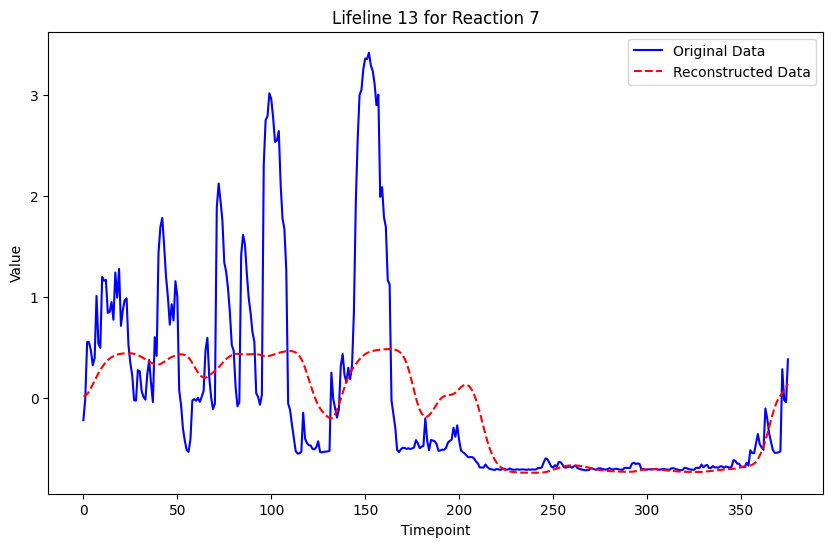

<Figure size 640x480 with 0 Axes>

In [15]:
plot_save_path_timesteps = "D:/Desktop/Work/Official Repo/plots/lifeline_reconstruction_timesteps.png"  # Adjust this path as needed
plot_lifeline_reconstruction(best_model_timesteps, normalized_data, lifeline_index, reaction_index, plot_save_path_timesteps)

In [5]:
models_dir = "D:\\Desktop\\Work\\Official Repo\\src\\models"
analysis_dir = "D:\\Desktop\\Work\\Official Repo\\src\\analysis"
    
# Choose which model to analyze
model_type = 'autoencoder' 
    
if model_type == 'autoencoder':
    model_name = "autoencoder_best_model.h5"
elif model_type == 'autoencoder_timesteps':
    model_name = "autoencoder_timesteps_best_model.h5"
    
model_path = os.path.join(models_dir, model_name)
autoencoder = load_autoencoder_model(model_path)
    
    
save_dir = os.path.join(analysis_dir, "latent_space_analysis")

save_latent_perturbation_analysis(autoencoder, normalized_data, save_dir, model_type == 'autoencoder')

1/1 [==============================] - 1s 1s/step


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed